# K-Prototype clustering
Demonstrating RFMTC analysis using K-prototype clustering model on blood transfusion database.

In [94]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from kmodes.kprototypes import KPrototypes

In [95]:
# reading data
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', sep=",",engine = 'python')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [96]:
c=df.columns[:-1]
c

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'],
      dtype='object')

In [97]:
# standardising data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_1=scaler.fit_transform(df[c])
df_1=pd.DataFrame(df_1,columns=c)
df.update(df_1)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,-0.927899,7.623346,7.623346,2.615633,1
1,-1.175118,1.282738,1.282738,-0.257881,1
2,-1.051508,1.796842,1.796842,0.029471,1
3,-0.927899,2.482313,2.482313,0.439973,1
4,-1.051508,3.167784,3.167784,1.753579,0


In [98]:
blood_matrix = df.values

In [99]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(blood_matrix, categorical=[4])

In [100]:
kproto.cluster_centroids_

array([[-0.52616733,  6.10245718,  6.10245718,  2.44630135,  1.        ],
       [-0.29352462,  0.23674811,  0.23674811,  0.56815766,  0.        ],
       [-0.26291005,  1.64282753,  1.64282753,  1.44232506,  0.        ],
       [-0.64668675, -0.52090766, -0.52090766, -0.90254016,  0.        ],
       [ 1.15986255, -0.4965349 , -0.4965349 , -0.17872668,  0.        ]])

In [101]:
# the cost of clusters created
kproto.cost_

909.3681461274576

In [102]:
# adding the clusters to the main dataframe
df['cluster_id']=clusters
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,cluster_id
0,-0.927899,7.623346,7.623346,2.615633,1,0
1,-1.175118,1.282738,1.282738,-0.257881,1,1
2,-1.051508,1.796842,1.796842,0.029471,1,2
3,-0.927899,2.482313,2.482313,0.439973,1,2
4,-1.051508,3.167784,3.167784,1.753579,0,2


In [104]:
clusterDf=pd.DataFrame(df['cluster_id'].value_counts())
clusterDf

,cluster_id
3,240
1,212
4,209
2,79
0,8


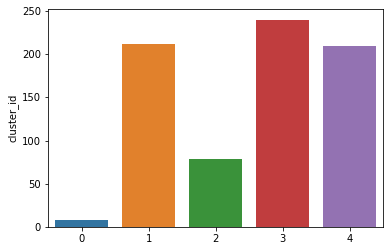

In [106]:
sns.barplot(x=clusterDf.index,y=clusterDf.cluster_id)

1
2
3
4
5
6
7
8
9
10
11
12


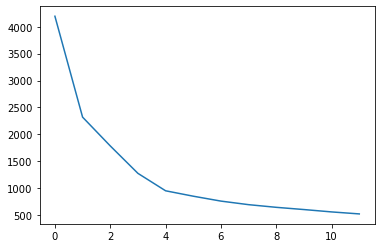

In [108]:
# choosing optimal value for K
cost=[]
for i in list(range(1,13,1)):
    print(i)
    kproto=KPrototypes(n_clusters=i,init='Cao')
    kproto.fit_predict(df,categorical=[4])
    cost.append(kproto.cost_)
plt.plot(cost)

The ideal value of K appears to be 4